In [38]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import requests
import datetime
#pd.set_option ('display. mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

# 1.1 Reading data from a csv file


You can read data from a CSV file using the `read_csv` function. By default, it assumes that the fields are comma-separated.

About this data set: FDIC Failed Bank List. This list includes banks which have failed since October 1, 2000. 

In [4]:
url = 'http://www.fdic.gov/bank/individual/failed/banklist.csv'
result = requests.get(url)

In [9]:
result.status_code

200

In [ ]:
!ls -al

In [6]:
result.headers

{'Content-Type': 'text/csv', 'Content-Length': '45496', 'Connection': 'keep-alive', 'Date': 'Tue, 09 Apr 2019 03:10:11 GMT', 'Access-Control-Allow-Origin': '*', 'Cache-Control': 'max-age=30', 'Content-Security-Policy': 'require-sri-for script', 'Expires': 'Tue, 09 Apr 2019 03:10:41 GMT', 'Last-Modified': 'Wed, 06 Feb 2019 20:10:49 GMT', 'X-Amz-Version-Id': 'icLFjZwIDlOtmJpE6wqAFzU78DES_pNl', 'X-Ua-Compatible': 'IE=Edge,chrome=1', 'X-Vcap-Request-Id': '8a15bd0a-89ab-4b12-5873-6d7d047029b1', 'X-Frame-Options': 'ALLOW', 'Strict-Transport-Security': 'max-age=31536000', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'X-Cache': 'Miss from cloudfront', 'Via': '1.1 316430958c7664ce84a9544466b4155f.cloudfront.net (CloudFront)', 'X-Amz-Cf-Id': 'ggM-LSgBIp23ROKtY3bzx0wlaBzKFSpnp3j8kEPxxdP1k96bxxf5Og=='}

In [39]:
wkrpt = pd.read_csv('test_weekly_reports.csv')

In [40]:
wkrpt[:5]

,week;invoice_count;invoice_total;item_count;sales_commission
0,14-Apr-2019;647;24706.61;27821;1235.33
1,07-Apr-2019;841;49726.68;13456;2486.33
2,31-Mar-2019;952;83051.31;20944;4152.57
3,24-Mar-2019;858;56883.87;52338;2844.19
4,17-Mar-2019;1162;5483.27;54614;274.16


In [ ]:
fail_banks = pd.read_csv('../banklist.csv')

In [5]:
# Look at the first 3 rows
broken_df[:3]

,Date;Berri 1;Br�beuf (donn�es non disponibles);C�te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn�es non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


You'll notice that this is totally broken! `read_csv` has a bunch of options that will let us fix that, though. Here we'll

* change the column separator to a `;`
* Set the encoding to `'latin1'` (the default is `'utf8'`)
* Parse the dates in the 'Date' column
* Tell it that our dates have the day first instead of the month first
* Set the index to be the 'Date' column

In [41]:
invoice_df = pd.read_csv('test_weekly_reports.csv', sep=';', parse_dates=['week'], dayfirst=True, index_col='week')

invoice_df[:3]

,invoice_count,invoice_total,item_count,sales_commission
week,,,,
2019-04-14,647,24706.61,27821,1235.33
2019-04-07,841,49726.68,13456,2486.33
2019-03-31,952,83051.31,20944,4152.57


In [ ]:

#invoice_df['week'] = pd.to_datetime(invoice_df['week'])
#invoice_df['week'] = pd.to_datetime(invoice_df['week'])
invoice_df[:4]

# 1.2 Selecting a column

When you read a CSV, you get a kind of object called a `DataFrame`, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

Here's an example:

In [24]:
x = sum(invoice_df['sales_commission'])
print(x)

99357.54


# 1.3 Plotting a column

Just add `.plot()` to the end! How could it be easier? =)

We can see that, unsurprisingly, not many people are biking in January, February, and March, 

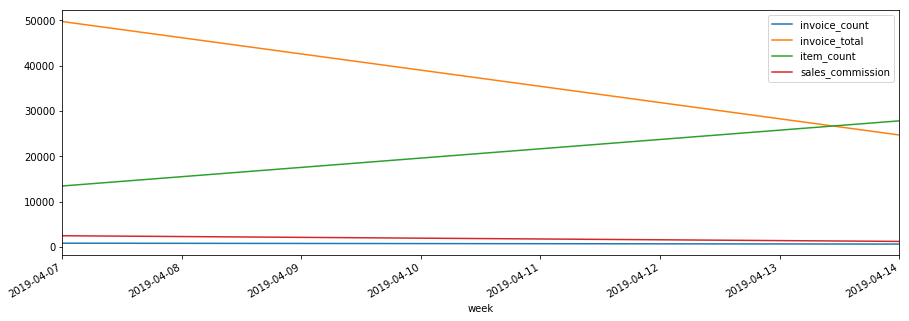

In [43]:
invoice_df[:2].plot()  #figsize=(30, 25))

We can also plot all the columns just as easily. We'll make it a little bigger, too.
You can see that it's more squished together, but all the bike paths behave basically the same -- if it's a bad day for cyclists, it's a bad day everywhere.

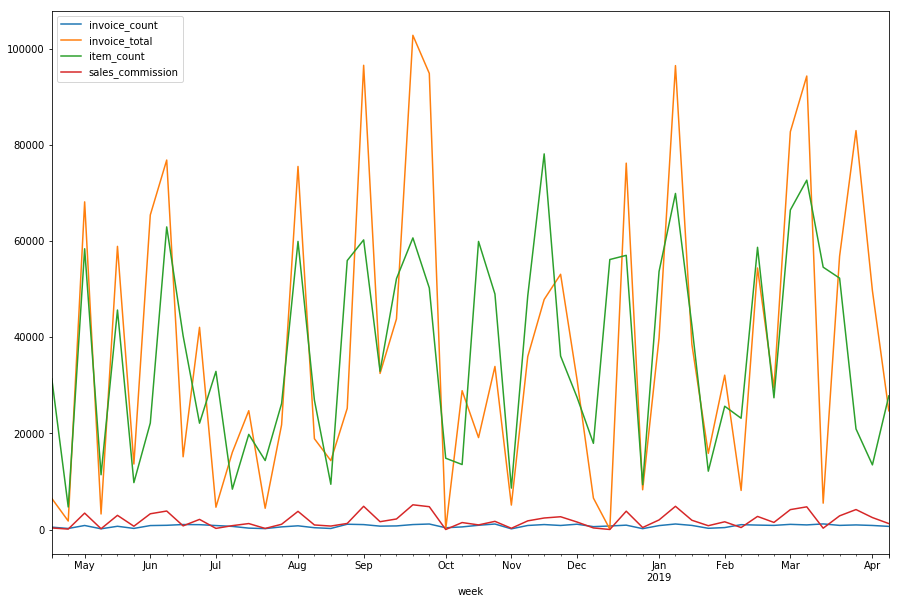

In [31]:
invoice_df.plot(figsize=(15, 10))

# 1.4 Putting all that together

Here's the code we needed to write do draw that graph, all together:

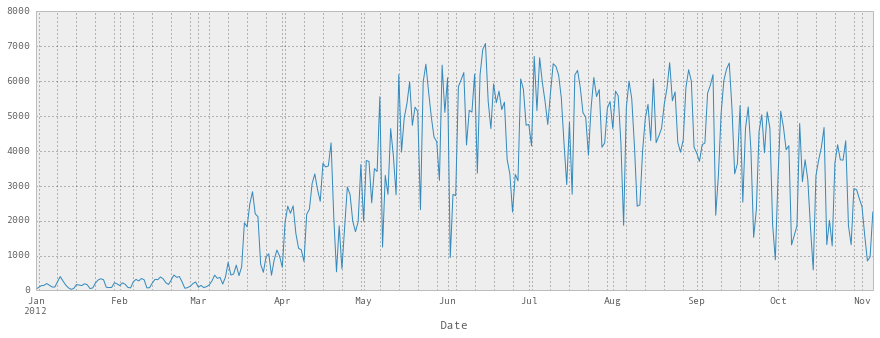

In [10]:
df = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
df['Berri 1'].plot()

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  